<a href="https://colab.research.google.com/github/pramudyadika/Time-Series-Forecasting/blob/main/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIME SERIES FORECASTING SAHAM SEKI DENGAN ARIMA DAN EXPONENTIAL SMOOTHING**

### **PROBLEM STATEMENT**

Project ini mencakup data jumlah lembar saham yang terjual(dalam juta lembar) pada setiap bulan, dimulai dari Januari 2015 hingga Desember 2016. Setiap baris dalam dataset mencantumkan tanggal dan jumlah lembar pada bulan tersebut.

1. **Tujuan Proyek**
   - Memprediksi jumlah lembar untuk bulan-bulan mendatang berdasarkan tren historis.
   - Melihat ada tidaknya tren, siklus atau seasonal.

2. **Sumber Data**
   - Sumber data berasal dari Statistik Ekonomi dan Keuangan Indonesia periode Januari 2015 hingga Desember 2016.

3. **Variabel Utama**
   - Variabel utama yang akan diprediksi adalah 'jumlah_lembar'.

4. **Langkah-Langkah**
   - Eksplorasi visual data untuk memahami tren.
   - Preprocessing data, termasuk penanganan missing value atau outlier jika diperlukan.
   - Identifikasi metode forecasting yang sesuai berdasarkan karakteristik data, seperti model eksponensial smoothing atau ARIMA.

### **IMPORT LIBRARY DAN DATASET**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/dataset_seki_saham.xlsx')
df.head()

,date,jumlah_lembar
0,2015-01-01,79156
1,2015-02-01,94791
2,2015-03-01,131300
3,2015-04-01,114330
4,2015-05-01,94130


> Menyesuaikan format datetime

In [ ]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

> Melihat grafik

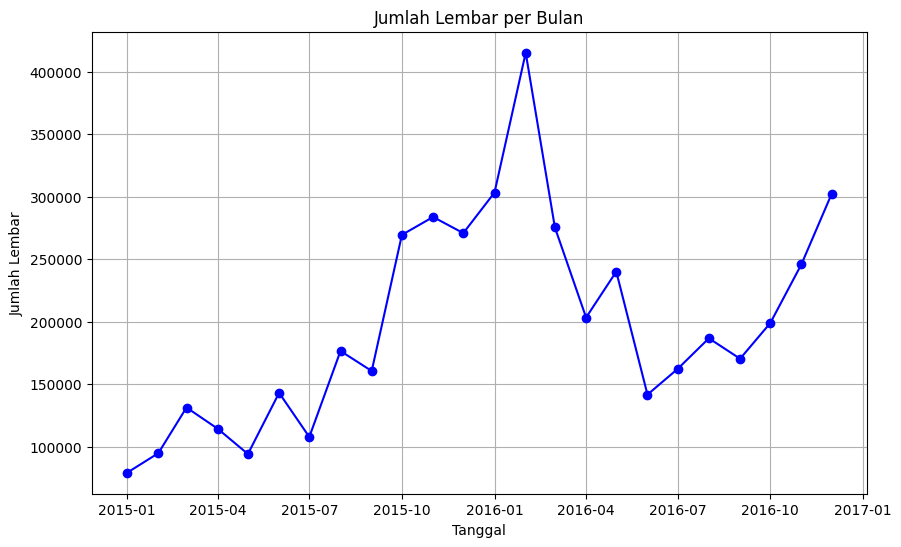

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['jumlah_lembar'], marker='o', linestyle='-', color='b')
plt.title('Jumlah Lembar per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Lembar')
plt.grid(True)
plt.show()

Terlihat grafik visualisasi dari Januari 2015 hingga Desember 2016

## **TIME SERIES FORECASTING: ARIMA**

ARIMA (AutoRegressive Integrated Moving Average) adalah model statistik yang digunakan untuk analisis deret waktu dan peramalan. Model ini menggabungkan tiga komponen utama: AutoRegressive (AR), Integrated (I), dan Moving Average (MA).



1.   AR (AutoRegressive): Memperhitungkan nilai sebelumnya untuk memprediksi nilai saat ini.

2. I (Integrated): Melibatkan diferensiasi data untuk membuatnya stasioner (tanpa tren atau pola yang konsisten).
3. MA (Moving Average): Memodelkan hubungan antara kesalahan sebelumnya dan kesalahan saat ini.


>Notasi ARIMA dituliskan sebagai (p, d, q), dengan p sebagai derajat AR, d sebagai derajat diferensiasi, dan q sebagai derajat MA. Contoh penggunaan: (0, 0, 10) berarti tidak ada AR, tidak ada diferensiasi, dan ada 10 elemen dalam komponen MA.



#### **MELIHAT CONTOH MODEL ARIMA(1,1,1)**

In [ ]:
# Set 'date' column as the index
df.set_index('date', inplace=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Create the ARIMA model
ARIMA_model = ARIMA(endog=df['jumlah_lembar'], order=(1,1,1))

# Fit the model
results = ARIMA_model.fit()

# Print the summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:          jumlah_lembar   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -285.138
Date:                Fri, 15 Dec 2023   AIC                            576.277
Time:                        13:24:35   BIC                            579.683
Sample:                    01-01-2015   HQIC                           577.134
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0885      1.607     -0.055      0.956      -3.238       3.061
ma.L1         -0.0598      1.662     -0.036      0.971      -3.316       3.197
sigma2      3.944e+09   1.44e-10   2.74e+19      0.0

In [ ]:
# Set the date range for forecasting
start_date = '2015-01-01'
end_date = '2016-12-01'

# Forecast using the ARIMA model
forecast = results.predict(start=start_date, end=end_date)

# Add the forecast values to the DataFrame
df['forecast'] = forecast

In [ ]:
df.head()

,jumlah_lembar,forecast
date,,
2015-01-01,79156,0.000000
2015-02-01,94791,67525.609644
2015-03-01,131300,91777.440456
2015-04-01,114330,125706.835113
2015-05-01,94130,116511.496194


> Visualisasi Forecasting dengan ARIMA

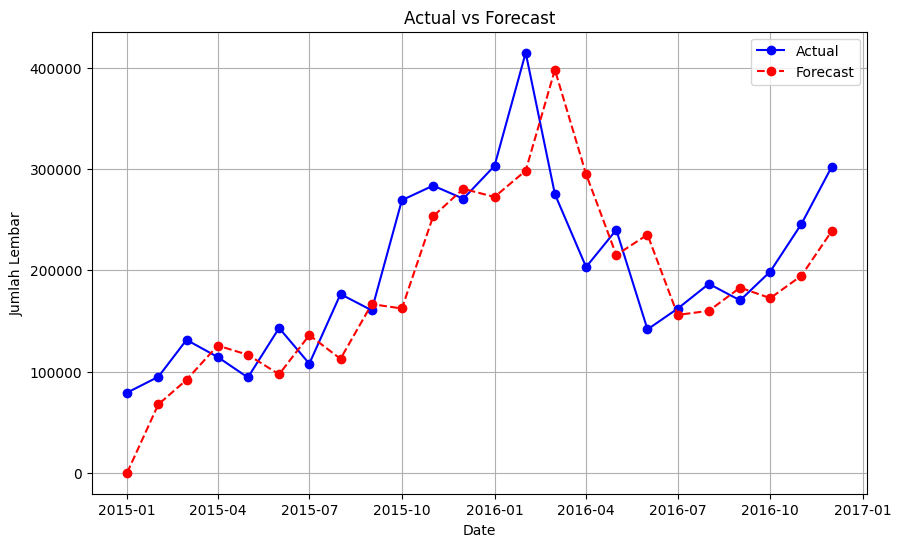

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['jumlah_lembar'], label='Actual', marker='o', linestyle='-', color='b')
plt.plot(df.index, df['forecast'], label='Forecast', marker='o', linestyle='--', color='r')

# Set labels and title
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Jumlah Lembar')

# Display legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## **TRAINING ARIMA MODEL**

Dimulai dengan membagi dataset menjadi training dan testing data.

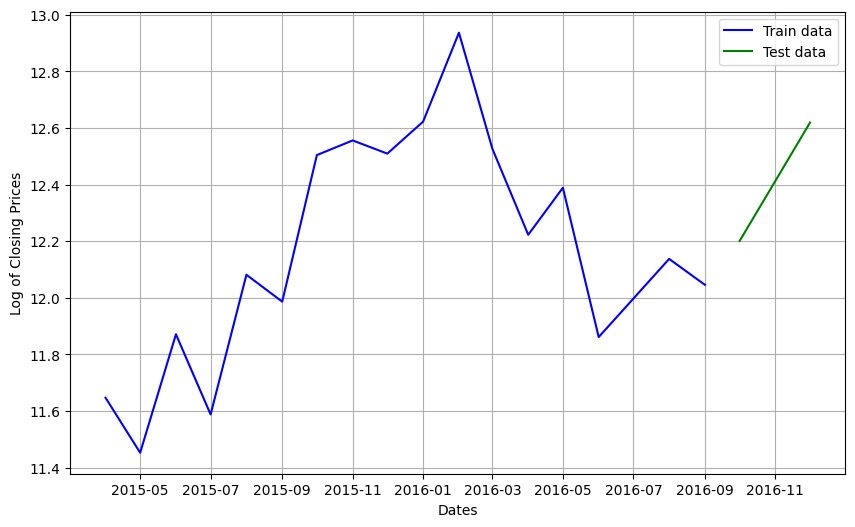

In [ ]:
# Assuming 'jumlah_lembar' is the column you want to use
df_log = df['jumlah_lembar'].apply(lambda x: np.log(x))  # Log transformation

# Split the data into training and testing sets
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

# Plot the data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Log of Closing Prices')

# Plotting training data
plt.plot(train_data, 'blue', label='Train data')

# Plotting test data
plt.plot(test_data, 'green', label='Test data')

plt.legend()
plt.show()


### **Mencari model ARIMA terbaik dengan autoARIMA**

AutoARIMA secara otomatis mengeksplorasi berbagai kombinasi parameter ARIMA dan memilih model terbaik berdasarkan kriteria seperti Akaike Information Criterion (AIC) atau Bayesian Information Criterion (BIC).

Prosesnya mencakup iterasi melalui berbagai kombinasi parameter ARIMA, pelatihan model untuk setiap kombinasi, dan memilih model dengan kriteria evaluasi yang optimal. AutoARIMA membantu menghindari kebutuhan untuk secara manual mencoba berbagai parameter dan mempercepat proses pemilihan model.

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=28.067, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=18.033, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=26.069, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=15.985, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=16.603, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=13.985, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=16.039, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=14.656, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=15.301, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=13.500, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,2,2

> Memilih Model dengan order=(0,2,2) Sesuai 'Best Model' menurut autoARIMA

In [ ]:
# Build Model
model = ARIMA(train_data, order=(0,2,2))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:          jumlah_lembar   No. Observations:                   18
Model:                 ARIMA(0, 2, 2)   Log Likelihood                  -3.632
Date:                Fri, 15 Dec 2023   AIC                             13.264
Time:                        13:24:46   BIC                             15.582
Sample:                    04-01-2015   HQIC                            13.383
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1639      0.504     -2.308      0.021      -2.152      -0.175
ma.L2          0.8748      0.852      1.027      0.304      -0.795       2.544
sigma2         0.0755      0.049      1.551      0.1

In [ ]:
conf = fitted.forecast(321, alpha=0.05)

### **Visualisasi Hasil Forecast**

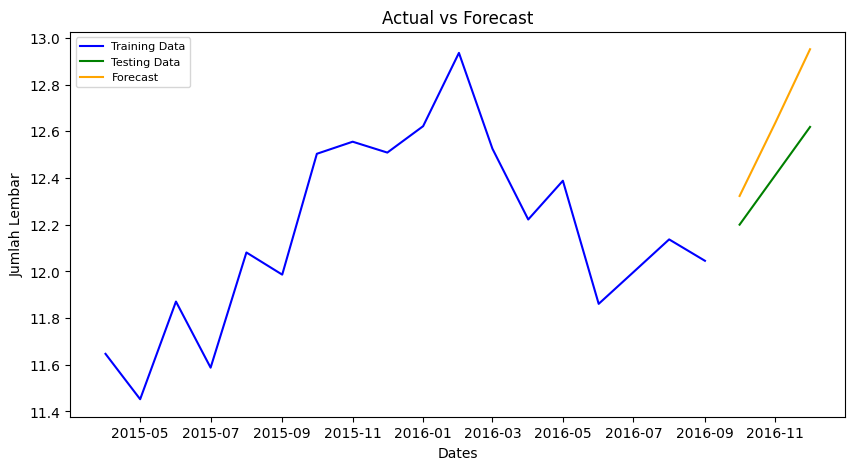

In [ ]:
# Make as pandas series
fc_series = pd.Series(conf, index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, color = 'blue', label='Training Data')
plt.plot(test_data, color = 'green', label='Testing Data')
plt.plot(fc_series, color = 'orange',label='Forecast')
plt.title('Actual vs Forecast')
plt.xlabel('Dates')
plt.ylabel('Jumlah Lembar')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Secara umum, model ARIMA(0, 2, 2) ini dapat dianggap memadai dalam memodelkan data 'jumlah_lembar'. Dengan deksripsi performa sebagai berikut:

> Dengan **AIC: 13.264** dan **BIC: 15.582** yang termasuk rendah, dapat dikatakan model memberikan representasi yang baik terhadap data tanpa meningkatkan kompleksitas secara berlebihan.

> Selain itu, Uji statistik residual menunjukkan bahwa model mampu menangkap pola-pola dalam data dan tidak ada indikasi signifikan terhadap keterlambatan atau ketidaknormalan dalam residual.

## **SIMPLE EXPONENTIAL SMOOTHING**

Simple Exponential Smoothing (SES) adalah metode forecasting yang digunakan untuk meramalkan data time series dengan mengambil bobot eksponensial terhadap observasi sebelumnya. Metode ini dirancang untuk menangkap tren dan pola dalam data time series tanpa memerlukan penyesuaian parameter yang rumit.

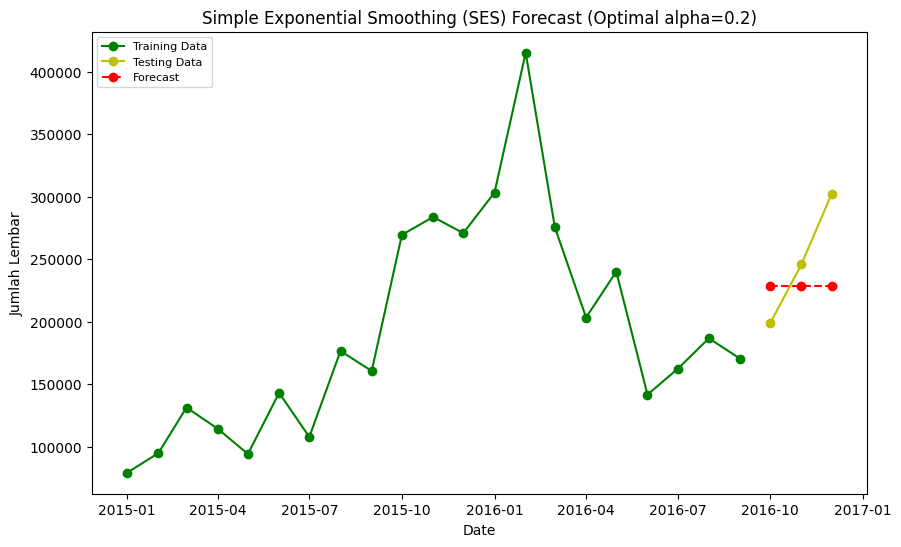

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

# Extract the 'jumlah_lembar' column
data = df['jumlah_lembar']

# Split the data into training and testing sets
train_data = data[:int(len(data) * 0.9)]
test_data = data[int(len(data) * 0.9):]

# Optimize alpha parameter
best_mse = float('inf')
best_alpha = None

for alpha in [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    model = SimpleExpSmoothing(train_data)
    fit_model = model.fit(smoothing_level=alpha)
    forecast = fit_model.forecast(len(test_data))
    mse = mean_squared_error(test_data, forecast)

    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# Fit the final model on the entire training data with the best alpha
final_model = SimpleExpSmoothing(data)
fit_final_model = final_model.fit(smoothing_level=best_alpha)

# Forecast on the test data
forecast = fit_final_model.forecast(len(test_data))

# Plotting the actual data, training data, and forecast
plt.figure(figsize=(10, 6))
#plt.plot(data.index, data, label='Actual', marker='o', linestyle='-', color='b')
plt.plot(train_data.index, train_data, label='Training Data', marker='o', linestyle='-', color='g')
plt.plot(test_data.index, test_data, label='Testing Data', marker='o', linestyle='-', color='y')
plt.plot(test_data.index, forecast, label='Forecast', marker='o', linestyle='--', color='r')
plt.title(f'Simple Exponential Smoothing (SES) Forecast (Optimal alpha={best_alpha})')
plt.xlabel('Date')
plt.ylabel('Jumlah Lembar')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Dalam implementasi ini, model *Simple Exponential Smoothing* (SES) dari library `statsmodels` digunakan untuk melakukan peramalan pada deret waktu 'jumlah_lembar'.

Proses dimulai dengan persiapan data training dan testing. Selanjutnya, dilakukan iterasi melalui berbagai nilai alpha, yang merupakan tingkat smoothing pada model SES, untuk mencari nilai alpha terbaik. Setiap nilai alpha diuji dengan melatih model SES pada data pelatihan dan melakukan peramalan pada data pengujian. Mean Squared Error (MSE) dihitung untuk mengevaluasi seberapa baik model dapat memprediksi data pengujian. Alpha yang memberikan MSE terendah dipilih sebagai parameter terbaik.

Dengan menggunakan alpha terbaik, model SES akhir dilatih pada seluruh data pelatihan, dan hasilnya digunakan untuk meramalkan data pengujian. Proses ini memungkinkan pemilihan parameter yang optimal dan memastikan model SES dioptimalkan untuk peramalan deret waktu yang diberikan.

### **Mengecek Tren dan Seasonal**

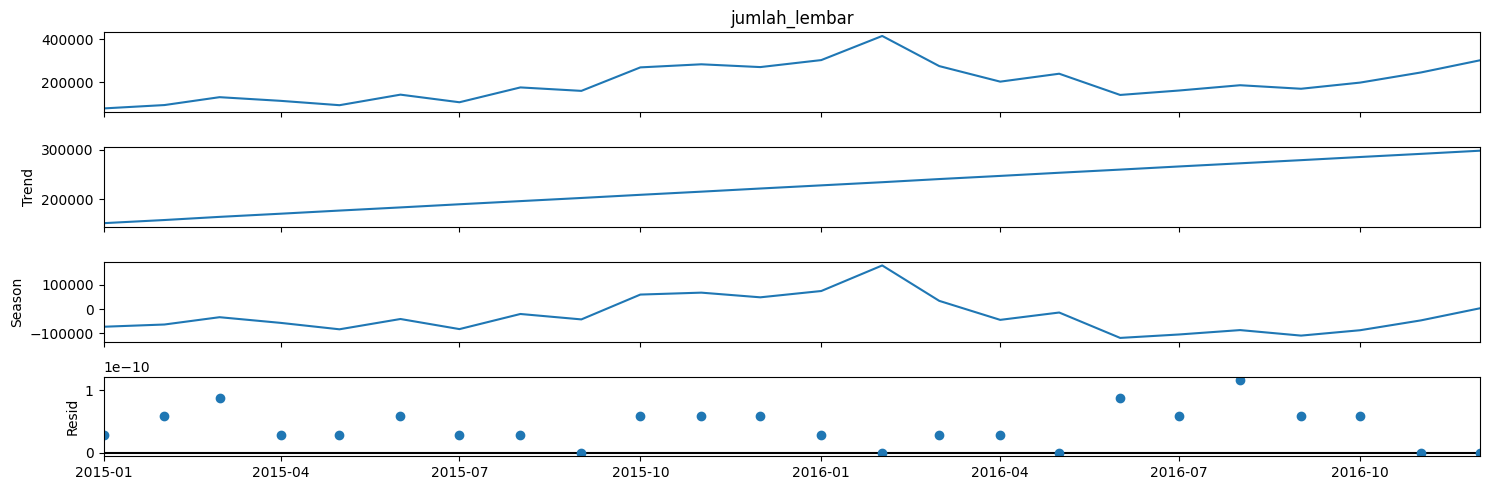

In [ ]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(df['jumlah_lembar'], seasonal=13)  # Assuming a monthly seasonal pattern
result = stl.fit()

# Plot the decomposition
result.plot()

# Display the plot
plt.show()

Dari grafik, dapat dilihat bahwa terdapat tren positif karena terjadi peningkatan secara keseluruhan. Selain itu, terlihat adanya pola seasonal yang ditandai dengan peningkatan jumlah penjualan lembar saham pada awal tahun, khususnya sekitar bulan Februari.

### **KESIMPULAN**

> Dalam proyek time series forecasting ini, model ARIMA(0, 2, 2) diterapkan untuk memodelkan data 'jumlah_lembar', dan performanya diukur dengan nilai AIC dan BIC yang rendah, menunjukkan representasi yang baik tanpa meningkatkan kompleksitas secara berlebihan. Uji statistik residual menunjukkan bahwa model mampu menangkap pola dalam data tanpa indikasi signifikan terhadap keterlambatan atau ketidaknormalan.

> Selain itu, penerapan metode *smooth exponential smoothing* (SES) melibatkan iterasi untuk menemukan tingkat smoothing terbaik, dan model SES yang dihasilkan dioptimalkan untuk peramalan data pengujian.

> Analisis tren dan pola musiman juga mengindikasikan tren positif dan pola musiman pada data 'jumlah_lembar', khususnya dengan peningkatan penjualan lembar saham pada awal tahun. Keseluruhan, pendekatan ini memberikan representasi yang baik terhadap data dan memberikan hasil forecasting yang memuaskan.